In [1]:
import pandas as pd
import xarray as xr
import os

import numpy as np
import gsw
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
file = 'processed.nc' 
ds = xr.open_dataset(file,decode_times=False)
#ds

In the printout from the xarray.Dataset object, the values of the dimensions and coordinates are stored inside the DataArray object. For instance, the
Temperature data variable contains a one-dimensional array of float variables,
with the dimensions obs which have a length of 317260.
respectively. The available coordinates for the data are
Latitude, Longitude, Time, and Depth. 

In [3]:
for vars in ds.var():
    print(vars)  # list of nc variables

profile_id
u
v
trajectoryIndex
rowSize
backscatter
CDOM
chlorophyll
conductivity
conductivity_qc
ctd_timestamp
density
density_qc
depth_qc
dissolved_oxygen
instrument_ctd
lat_uv_qc
latitude_qc
lon_uv_qc
longitude_qc
oxygen_saturation
PAR
pitch
platform_meta
precise_lat
precise_lat_qc
precise_lon
precise_lon_qc
precise_time
precise_time_qc
pressure
pressure_qc
qartod_conductivity_flat_line_flag
qartod_conductivity_gross_range_flag
qartod_conductivity_primary_flag
qartod_conductivity_rate_of_change_flag
qartod_conductivity_spike_flag
qartod_density_flat_line_flag
qartod_density_gross_range_flag
qartod_density_primary_flag
qartod_density_rate_of_change_flag
qartod_density_spike_flag
qartod_monotonic_pressure_flag
qartod_pressure_flat_line_flag
qartod_pressure_gross_range_flag
qartod_pressure_primary_flag
qartod_pressure_rate_of_change_flag
qartod_pressure_spike_flag
qartod_salinity_flat_line_flag
qartod_salinity_gross_range_flag
qartod_salinity_primary_flag
qartod_salinity_rate_of_change_

# Examining Vertical Cross Sections
Using xarray, I can easily subset the data using the dimensions. For example,
perhaps I want to look at the vertical data in the first footprint. I can use the .sel
command to index the DataArray for a specific dimension and save the result to a
variable called prof. There are 930 values in this dimension and 0 will be the
first index

In [5]:
prof = ds.sel(profile=0).fillna(0)

In [6]:
lat, lon = prof.latitude.item(), prof.longitude.item()
lat, lon

(44.63769497775265, -124.30379745067705)

In [7]:
prof['dissolved_oxygen'] = prof.dissolved_oxygen * 1.025 / (44.661*0.7)

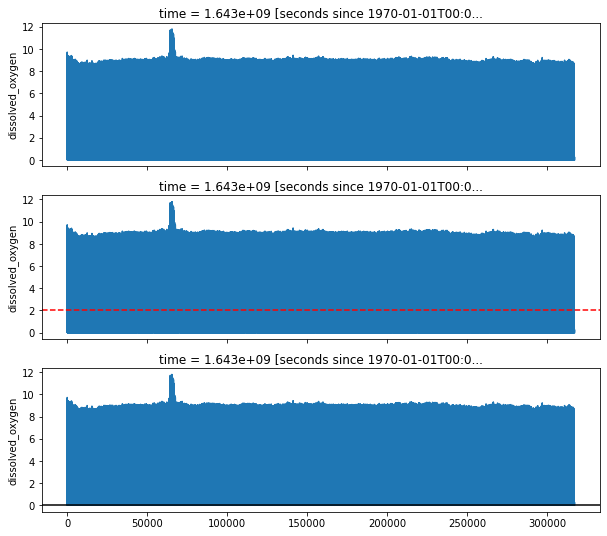

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True, figsize=(10,9))
prof.dissolved_oxygen.plot(ax=ax1) 
prof.dissolved_oxygen.plot(ax=ax2) 
prof.dissolved_oxygen.plot(ax=ax3) 


# Add line at 2mg/L for dissolved_oxygen

xlim = ax2.get_xlim()
ax2.plot([xlim[0],xlim[1]],[2,2],'r--')

# Add 0 line for Wind
ax3.plot([xlim[0],xlim[1]],[0,0],'k')
ax3.set_xlim(xlim);
ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('');

In [3]:
prof = ds.sel(profile=830).to_dataframe().fillna(0)
prof

wmo_id    profile_id          time   latitude  \
trajectory           obs                                                      
ce_382-20220125T1919 0       4801967  1.649763e+09  1.649763e+09  44.079931   
                     1       4801967  1.649763e+09  1.649763e+09  44.079931   
                     2       4801967  1.649763e+09  1.649763e+09  44.079931   
                     3       4801967  1.649763e+09  1.649763e+09  44.079931   
                     4       4801967  1.649763e+09  1.649763e+09  44.079931   
...                              ...           ...           ...        ...   
                     317255  4801967  1.649763e+09  1.649763e+09  44.079931   
                     317256  4801967  1.649763e+09  1.649763e+09  44.079931   
                     317257  4801967  1.649763e+09  1.649763e+09  44.079931   
                     317258  4801967  1.649763e+09  1.649763e+09  44.079931   
                     317259  4801967  1.649763e+09  1.649763e+09  44.079931   

                              longitude     lat_uv      lon_uv       time_uv  \
trajectory           obs                                                       
ce_382-20220125T1919 0      -125.985145  44.080056 -125.985133  1.649763e+09   
                     1      -125.985145  44.080056 -125.985133  1.649763e+09   
                     2      -125.985145  44.080056 -125.985133  1.649763e+09   
                     3      -125.985145  44.080056 -125.985133  1.649763e+09   
                     4      -125.985145  44.080056 -125.985133  1.649763e+09   
...                                 ...        ...         ...           ...   
                     317255 -125.985145  44.080056 -125.985133  1.649763e+09   
                     317256 -125.985145  44.080056 -125.985133  1.649763e+09   
                     317257 -125.985145  44.080056 -125.985133  1.649763e+09   
                     317258 -125.985145  44.080056 -125.985133  1.649763e+09   
                     317259 -125.985145  44.080056 -125.985133  1.649763e+09   

                                    u         v  ...      roll   salinity  \
trajectory           obs                         ...                        
ce_382-20220125T1919 0       0.020198  0.074195  ...  7.399979  31.132622   
                     1       0.020198  0.074195  ...  7.399979  31.771090   
                     2       0.020198  0.074195  ...  7.399979  32.118690   
                     3       0.020198  0.074195  ...  7.399979   0.000000   
                     4       0.020198  0.074195  ...  7.399979  32.150429   
...                               ...       ...  ...       ...        ...   
                     317255  0.020198  0.074195  ...  2.199998  34.377041   
                     317256  0.020198  0.074195  ...  2.199998   0.000000   
                     317257  0.020198  0.074195  ...  2.199998  34.378407   
                     317258  0.020198  0.074195  ...  1.799998  34.377384   
                     317259  0.020198  0.074195  ...  1.799998   0.000000   

                             salinity_qc                          source_file  \
trajectory           obs                                                        
ce_382-20220125T1919 0               0.0    ce_382-2022-024-3-0-sbd(01330000)   
                     1               0.0    ce_382-2022-024-3-0-sbd(01330000)   
                     2               0.0    ce_382-2022-024-3-0-sbd(01330000)   
                     3               0.0    ce_382-2022-024-3-0-sbd(01330000)   
                     4               0.0    ce_382-2022-024-3-0-sbd(01330000)   
...                                  ...                                  ...   
                     317255          0.0  ce_382-2022-096-0-131-sbd(01380131)   
                     317256          0.0  ce_382-2022-096-0-131-sbd(01380131)   
                     317257          0.0  ce_382-2022-096-0-131-sbd(01380131)   
                     317258          0.0  ce_382-2022-096-0-131-sbd(

In [4]:
import geopy.distance

prof['distance']=prof.apply(lambda row: geopy.distance.distance((47, 124.173),(row['latitude'],row['longitude'])).km, axis=1)

In [11]:
# convert the time variable to datetime
from datetime import datetime
prof['time'] = prof['time']/(24*3600) + datetime(1900,1,1).toordinal()
prof['time']

trajectory            obs   
ce_382-20220125T1919  0         712613.819158
                      1         712613.819158
                      2         712613.819158
                      3         712613.819158
                      4         712613.819158
                                    ...      
                      317255    712613.819158
                      317256    712613.819158
                      317257    712613.819158
                      317258    712613.819158
                      317259    712613.819158
Name: time, Length: 317260, dtype: float64

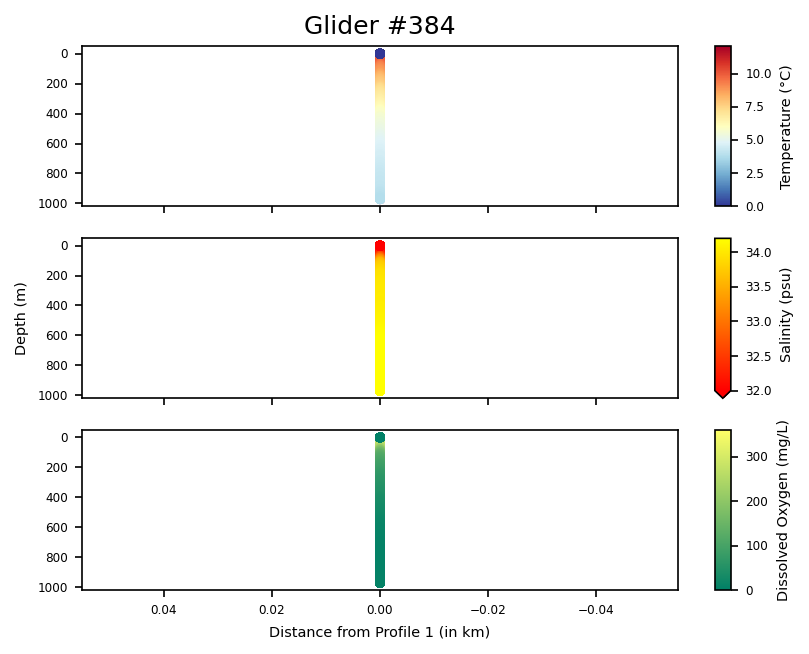

In [12]:
# Plot the data - Distance on x-axis
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.set_size_inches(6.4,4.8)
# fig.set_size_inches(8,8)
fig.set_dpi(150)

ms = 56 #marker size
a1 = ax1.scatter(prof.distance, prof.depth, c=prof.temperature, marker=".", s=ms, cmap='RdYlBu_r')
a2 = ax2.scatter(prof.distance, prof.depth, c=prof.salinity, marker=".", s=ms, cmap='autumn', vmin=32, vmax=34.2)
a3 = ax3.scatter(prof.distance, prof.depth, c=prof.dissolved_oxygen, marker=".", s=ms, cmap='summer') #vmin=0, vmax=300

cb1 = plt.colorbar(a1,ax=ax1, aspect=10)
cb2 = plt.colorbar(a2,ax=ax2,extend='min', aspect=10)
cb3 = plt.colorbar(a3,ax=ax3, aspect=10)
cb1.set_label('Temperature (°C)',fontsize='x-small')
cb2.set_label('Salinity (psu)',fontsize='x-small')
cb3.set_label('Dissolved Oxygen (mg/L)',fontsize='x-small')

ax2.set_ylabel("Depth (m)",fontsize='x-small')
ax1.invert_yaxis()

ax3.set_xlabel('Distance from Profile 1 (in km)',fontsize='x-small')
#ax1.set_xlim(min(prof.distance),max(prof.distance));
ax1.invert_xaxis()

ax1.set_title('Glider #384')

ax1.tick_params(labelsize='xx-small')
ax2.tick_params(labelsize='xx-small')
ax3.tick_params(labelsize='xx-small')
cb1.ax.tick_params(labelsize='xx-small')
cb2.ax.tick_params(labelsize='xx-small')
cb3.ax.tick_params(labelsize='xx-small')

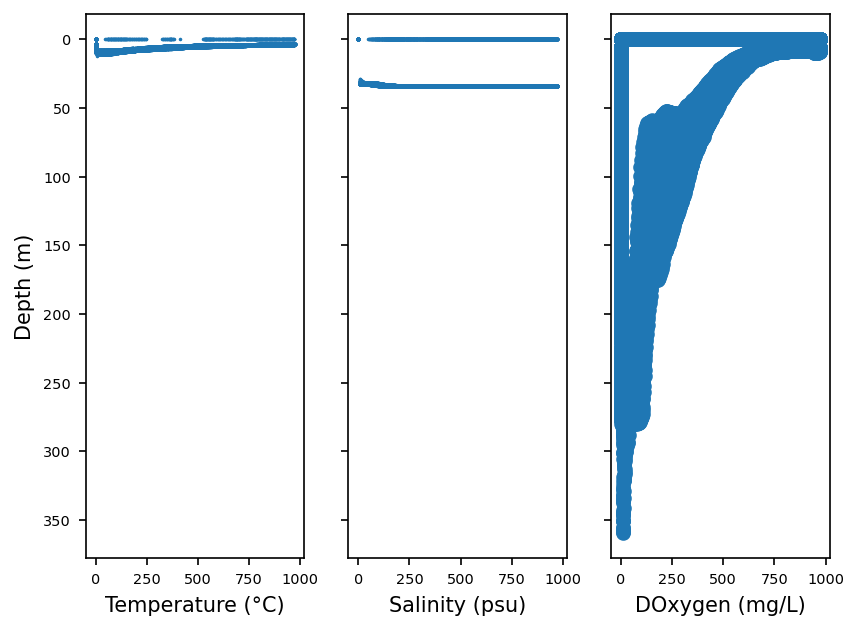

In [13]:
# Plot the data
fig, (ax1,ax2,ax3) = plt.subplots(1,3, sharex=False, sharey=True)
fig.set_size_inches(6.4,4.8)
fig.set_dpi(150)

a1 = ax1.scatter(prof.depth, prof.temperature, marker=".", s=2)
a2 = ax2.scatter(prof.depth, prof.salinity, marker=".", s=2)
a3 = ax3.scatter(prof.depth, prof.dissolved_oxygen)
ax1.set_ylabel("Depth (m)")
ax1.set_xlabel("Temperature (°C)")
ax2.set_xlabel("Salinity (psu)")
ax3.set_xlabel("DOxygen (mg/L)")

ax1.invert_yaxis()

ax1.tick_params(labelsize='x-small')
ax2.tick_params(labelsize='x-small')
ax3.tick_params(labelsize='x-small')

In [16]:
from erddapy import ERDDAP
e = ERDDAP(server="https://gliders.ioos.us/erddap")


In [17]:
from netCDF4 import Dataset


e.constraints = None
e.protocol = "tabledap"
e.dataset_id = "ce_382-20220125T1919"

opendap_url = e.get_download_url(
    response="opendap",
)

print(opendap_url)
with Dataset(opendap_url) as nc:
    print(nc.summary)

https://gliders.ioos.us/erddap/tabledap/ce_382-20220125T1919
The Endurance Array is a multi-scaled array utilizing fixed and mobile assets to
observe cross-shelf and along-shelf variability in the coastal upwelling region
off the Oregon and Washington coasts. The array also provides an extensive
spatial footprint that encompasses a prototypical eastern boundary current
regime and connectivity with the Cabled Array. OOI Coastal Glider deployments
bridge the distances between the fixed sites of the Coastal Endurance Array and
allow for adaptive sampling of the coastal waters of Washington and Oregon.
This dataset contains raw Slocum glider data parsed directly from the native
glider file format. No corrections or other quality control algorithms have been
applied.


In [26]:
e.response = "nc"
e.variables = ["longitude","depth","latitude","backscatter", "temperature", "salinity","time","dissolved_oxygen"]

nc = e.to_ncCF()

print(nc.Conventions)
print(nc["temperature"])

Unidata Dataset Discovery v1.0, COARDS, CF-1.6
<class 'netCDF4._netCDF4.Variable'>
float32 temperature(obs)
    _ChunkSizes: 15
    _FillValue: nan
    accuracy: 0.002
    actual_range: [ 3.4504 12.0367]
    ancillary_variables: temperature_qc qartod_temperature_flat_line_flag qartod_temperature_gross_range_flag qartod_temperature_rate_of_change_flag qartod_temperature_spike_flag qartod_temperature_primary_flag
    bytes: 4
    colorBarMaximum: 32.0
    colorBarMinimum: 0.0
    coordinates: time latitude longitude depth
    instrument: instrument_ctd
    ioos_category: Temperature
    long_name: Sea Water Temperature
    observation_type: measured
    OOI_data_level: L1a
    OOI_data_product_name: TEMPWAT
    platform: platform
    precision: N/A
    resolution: 0.001
    source_sensor: sci_water_temp
    standard_name: sea_water_temperature
    units: Celsius
    valid_max: 40.0
    valid_min: -5.0
unlimited dimensions: 
current shape = (317260,)
filling on


In [28]:
import pandas as pd


df = e.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
).dropna()

df.head()

,longitude (degrees_east),depth (m),latitude (degrees_north),backscatter (m-1),temperature (Celsius),salinity (1),dissolved_oxygen (umol kg-1)
time (UTC),,,,,,,
2022-01-25 19:39:35+00:00,-124.303797,9.373403,44.637695,0.006069,9.6281,31.132622,290.473553
2022-01-25 19:39:35+00:00,-124.303797,13.221829,44.637695,0.003152,9.7523,31.771090,288.384352
2022-01-25 19:39:35+00:00,-124.303797,17.228876,44.637695,0.002962,9.9353,32.118690,286.663132
2022-01-25 19:39:35+00:00,-124.303797,20.670510,44.637695,0.002708,9.9626,32.150430,287.843433
2022-01-25 19:39:35+00:00,-124.303797,24.201347,44.637695,0.002962,9.7802,32.177288,293.039335


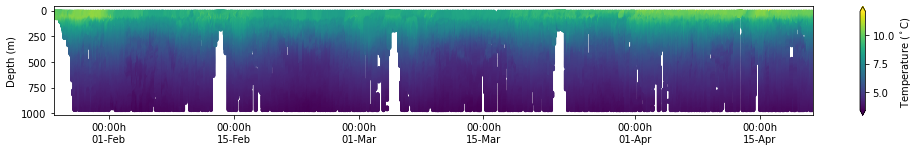

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(
    df.index,
    df["depth (m)"],
    s=15,
    c=df["temperature (Celsius)"],
    marker="o",
    edgecolor="none"
)

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter("%H:%Mh\n%d-%b")
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation="vertical", extend="both")
cbar.ax.set_ylabel("Temperature ($^\circ$C)")
ax.set_ylabel("Depth (m)");

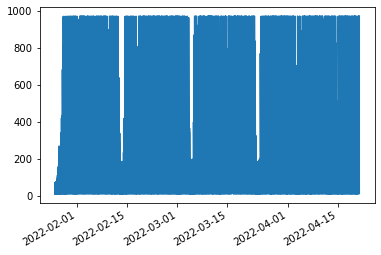

In [22]:
# Quick and dirty Depth timeseries plot
fig, ax = plt.subplots()

ax.plot(df.index, df["depth (m)"]);
fig.autofmt_xdate()

In [29]:
import geopy.distance

df['distance']=df.apply(lambda row: geopy.distance.distance((44.63769497775265, -124.30379745067705),(row['latitude (degrees_north)'],row['longitude (degrees_east)'])).km, axis=1)

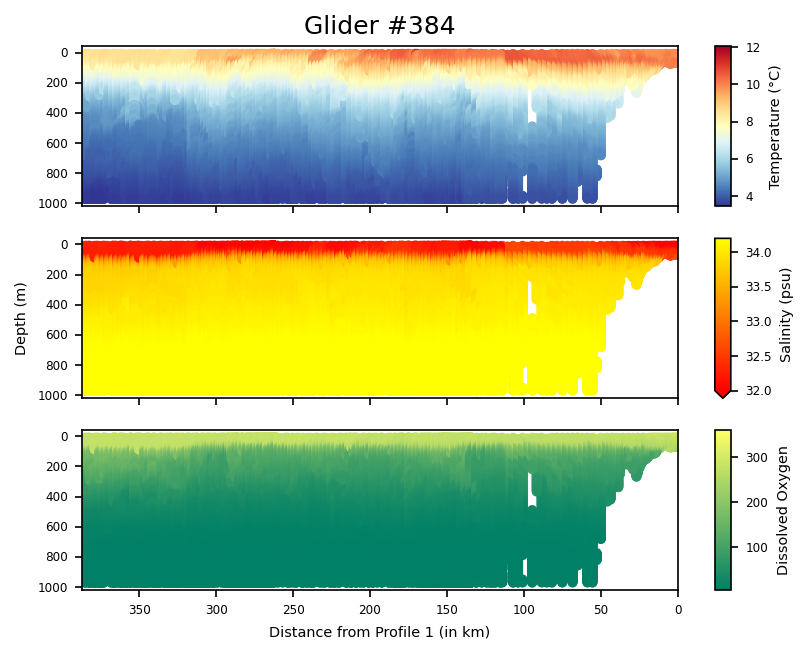

In [31]:
# Plot the data - Distance on x-axis
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.set_size_inches(6.4,4.8)
# fig.set_size_inches(8,8)
fig.set_dpi(150)

ms = 56 #marker size
a1 = ax1.scatter(df.distance, df['depth (m)'], c=df['temperature (Celsius)'], marker=".", s=ms, cmap='RdYlBu_r')
a2 = ax2.scatter(df.distance, df['depth (m)'], c=df['salinity (1)'], marker=".", s=ms, cmap='autumn', vmin=32, vmax=34.2)
a3 = ax3.scatter(df.distance, df['depth (m)'], c=df['dissolved_oxygen (umol kg-1)'], marker=".", s=ms, cmap='summer') #vmin=0, vmax=300

cb1 = plt.colorbar(a1,ax=ax1, aspect=10)
cb2 = plt.colorbar(a2,ax=ax2,extend='min', aspect=10)
cb3 = plt.colorbar(a3,ax=ax3, aspect=10)
cb1.set_label('Temperature (°C)',fontsize='x-small')
cb2.set_label('Salinity (psu)',fontsize='x-small')
cb3.set_label('Dissolved Oxygen',fontsize='x-small')

ax2.set_ylabel("Depth (m)",fontsize='x-small')
ax1.invert_yaxis()

ax3.set_xlabel('Distance from Profile 1 (in km)',fontsize='x-small')
ax1.set_xlim(min(df.distance),max(df.distance));
ax1.invert_xaxis()

ax1.set_title('Glider #384')

ax1.tick_params(labelsize='xx-small')
ax2.tick_params(labelsize='xx-small')
ax3.tick_params(labelsize='xx-small')
cb1.ax.tick_params(labelsize='xx-small')
cb2.ax.tick_params(labelsize='xx-small')
cb3.ax.tick_params(labelsize='xx-small')

C:\Users\aBr\AppData\Local\Temp\ipykernel_14772\1620168435.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ticks_loc=cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));


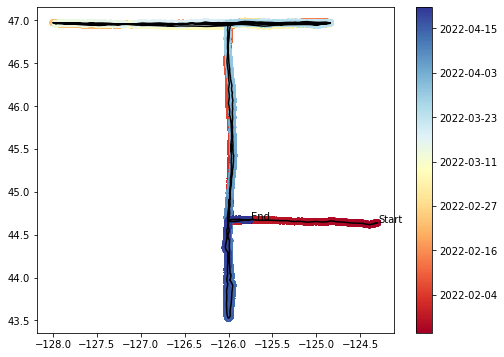

In [35]:
import matplotlib.ticker as mticker

plt.figure(figsize=(8,6))

plt.plot(df['longitude (degrees_east)'], df['latitude (degrees_north)'], c='black')
plt.scatter(df['longitude (degrees_east)'], df['latitude (degrees_north)'], c=df.index, cmap='RdYlBu')

# Label Start/End Points
plt.text(df['longitude (degrees_east)'].iloc[0]+.01, df['latitude (degrees_north)'].iloc[0]+.01, 'Start')
plt.text(df['longitude (degrees_east)'].iloc[-1]+.01, df['latitude (degrees_north)'].iloc[-1]+.01, 'End')

# Add a colorbar
cbar = plt.colorbar();

# Fix the colorbar ticks
ticks_loc=cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));
ax3.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))


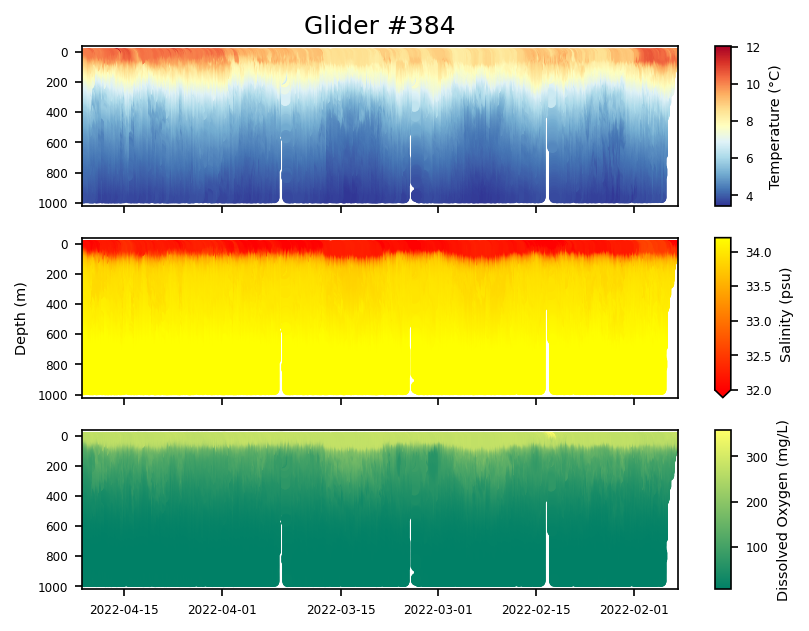

In [37]:
# Plot the data - Distance on x-axis
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True, sharey=True)
fig.set_size_inches(6.4,4.8)
# fig.set_size_inches(8,8)
fig.set_dpi(150)

ms = 56 #marker size
a1 = ax1.scatter(df.index, df['depth (m)'], c=df['temperature (Celsius)'], marker=".", s=ms, cmap='RdYlBu_r')
a2 = ax2.scatter(df.index, df['depth (m)'], c=df['salinity (1)'], marker=".", s=ms, cmap='autumn', vmin=32, vmax=34.2)
a3 = ax3.scatter(df.index, df['depth (m)'], c=df['dissolved_oxygen (umol kg-1)'], marker=".", s=ms, cmap='summer') #vmin=0, vmax=300


cb1 = plt.colorbar(a1,ax=ax1, aspect=10)
cb2 = plt.colorbar(a2,ax=ax2,extend='min', aspect=10)
cb3 = plt.colorbar(a3,ax=ax3, aspect=10)
cb1.set_label('Temperature (°C)',fontsize='x-small')
cb2.set_label('Salinity (psu)',fontsize='x-small')
cb3.set_label('Dissolved Oxygen (mg/L)',fontsize='x-small')

ax2.set_ylabel("Depth (m)",fontsize='x-small')
ax1.invert_yaxis()

ax1.set_xlim(min(df.index),max(df.index));
ax1.invert_xaxis()

ax1.set_title('Glider #384')

ax1.tick_params(labelsize='xx-small')
ax2.tick_params(labelsize='xx-small')
ax3.tick_params(labelsize='xx-small')
cb1.ax.tick_params(labelsize='xx-small')
cb2.ax.tick_params(labelsize='xx-small')
cb3.ax.tick_params(labelsize='xx-small')

Text(0, 0.5, 'Depth (m)')

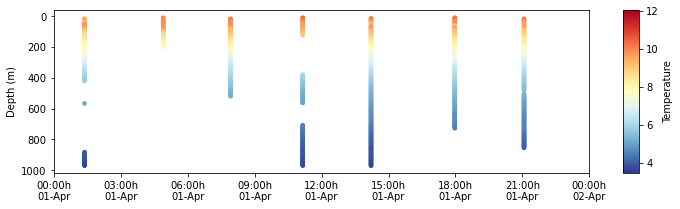

In [38]:
# Glider Transect plot
fig,ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12,3))
sc1 = ax1.scatter(df.index, df['depth (m)'], c=df['temperature (Celsius)'], s=12, cmap='RdYlBu_r')
cb1 = plt.colorbar(sc1, ax=ax1, aspect=10, label='Temperature')
ax1.invert_yaxis() # Invert y axis

# Specify the date range we want to plot as year,month,day
import datetime
ax1.set_xlim( datetime.datetime(2022,4,1), datetime.datetime(2022,4,2) ); 

# Fancier Date Labels
import matplotlib.dates as mdates
xfmt = mdates.DateFormatter("%H:%Mh\n%d-%b")
ax1.xaxis.set_major_formatter(xfmt)

ax1.set_ylabel('Depth (m)')

C:\Users\aBr\AppData\Local\Temp\ipykernel_14772\1752384050.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));


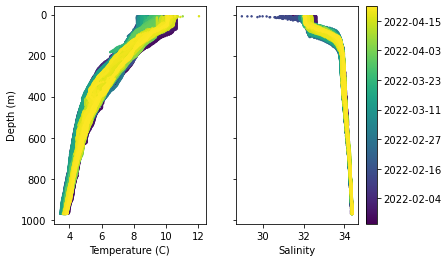

In [39]:
# Temperature Salinity Profile with Date
fig,(ax1,ax2) = plt.subplots(1, 2, sharey=True)
dx = ax1.scatter(df['temperature (Celsius)'],  df['depth (m)'], c=df.index, s=2)
dx1 = ax2.scatter(df['salinity (1)'],  df['depth (m)'], c=df.index, s=2)
ax1.invert_yaxis()

ax1.set_xlabel('Temperature (C)')
ax2.set_xlabel('Salinity')
ax1.set_ylabel('Depth (m)');

cb =fig.colorbar(dx1,ax=ax2)
cb.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

Text(0.5, 0, 'Salinuty')

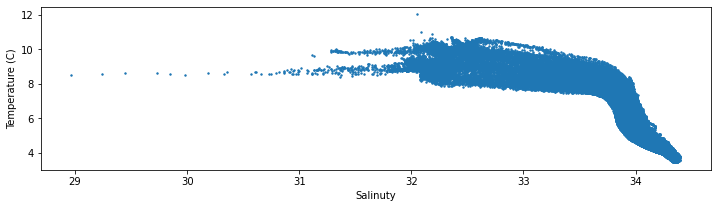

In [41]:
fig,ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12,3))

sc1 =ax1.scatter(df['salinity (1)'],df['temperature (Celsius)'], s=2)

ax1.set_ylabel('Temperature (C)')
ax1.set_xlabel('Salinuty')

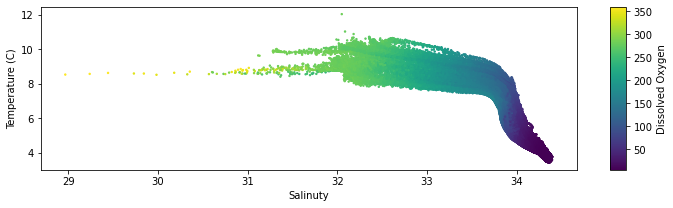

In [42]:
fig,ax1 = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12,3))

sc1 =ax1.scatter(df['salinity (1)'],df['temperature (Celsius)'],  c=df['dissolved_oxygen (umol kg-1)'], s=2)

ax1.set_ylabel('Temperature (C)')
ax1.set_xlabel('Salinuty')
cb1 = plt.colorbar(sc1, ax=ax1, aspect=10, label='Dissolved Oxygen')

In [44]:
import seawater,gsw
# Figure out boudaries (mins and maxs)
smin = df['salinity (1)'].min() - (0.01 * df['salinity (1)'].min())
smax = df['salinity (1)'].max() + (0.01 * df['salinity (1)'].max())
tmin = df['temperature (Celsius)'].min() - (0.1 * df['temperature (Celsius)'].max())
tmax = df['temperature (Celsius)'].max() + (0.1 * df['temperature (Celsius)'].max())

# Calculate the density lines
x = int(round((smax-smin)/0.1+1,0))
y = int(round((tmax-tmin)+1,0))

In [45]:
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,y-1,y)+tmin
si = np.linspace(1,x-1,x)*0.1+smin

In [46]:
# Create empty grid of zeros
dens = np.zeros((y,x))

# Loop to fill in grid with densities
for j in range(0,int(y)):
    for i in range(0, int(x)):
        dens[j,i]=gsw.rho(si[i],ti[j],0)

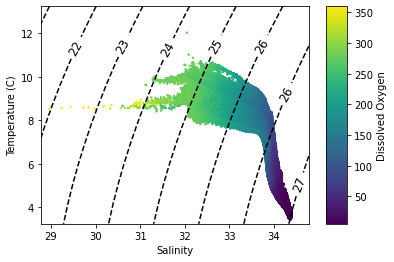

In [47]:
# Substract 1000 to convert to sigma-t
dens = dens - 1000

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
CS = plt.contour(si,ti,dens, linestyles='dashed', colors='k')
plt.clabel(CS, fontsize=12, inline=1, fmt='%1.0f') # Label every second level
 
sc1 =ax1.scatter(df['salinity (1)'],df['temperature (Celsius)'], c=df['dissolved_oxygen (umol kg-1)'], s=2)
 
ax1.set_xlabel('Salinity')
ax1.set_ylabel('Temperature (C)')
cb1 = plt.colorbar(sc1, ax=ax1, aspect=10, label='Dissolved Oxygen')
plt.show()